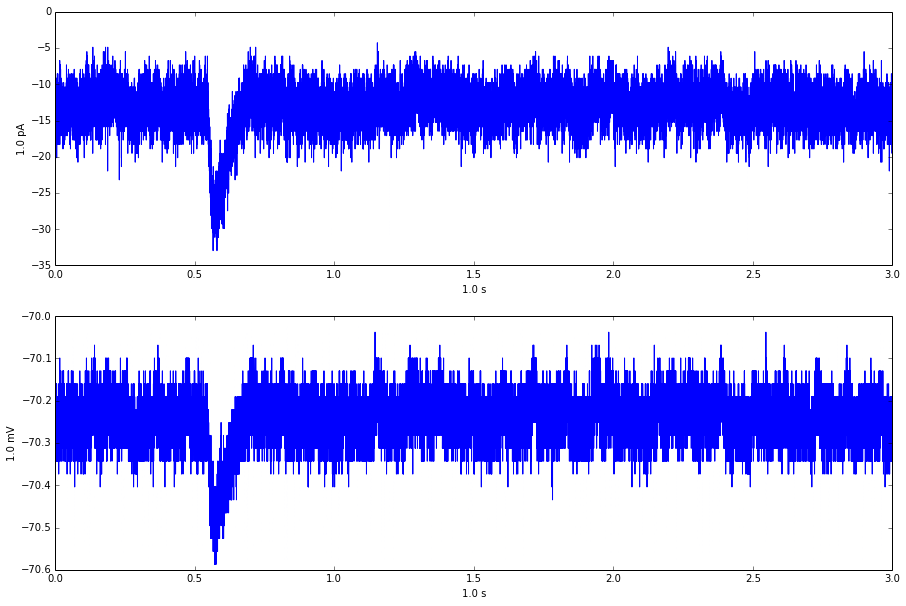

In [1]:
import sys
# include the toolkit path in the modules paths
sys.path.append('../scripts')


import neo
import numpy as np
from matplotlib import pyplot as plt
import marco_tools as mt
%matplotlib inline

from neo.io import AxonIO

# import urllib
# url = "https://portal.g-node.org/neo/axon/File_axon_3.abf"

filename = '../experimental/abf_test/20160127_0016.abf'
# urllib.urlretrieve(url, filename)

r = AxonIO(filename=filename)
bl = r.read()[0] # read the entire file > a Block

# print(bl)
# print bl.segments
# for seg in bl.segments:
#     print(seg)
#     print(seg.block) # parent access

segment = bl.segments[2]
# analogsignals = segment.analogsignals
# print segment.analogsignals


# import re
# s = "1.0 cm"
# m = re.search(r'[a-zA-z]+',s)
# print m.group()


fig = plt.figure(figsize=(15,10))

analogsignals = segment.analogsignals
ax = [None]*len(analogsignals)
for i,s in enumerate(analogsignals):
    ax[i] = fig.add_subplot(len(analogsignals),1,i+1)
    time = s.times.magnitude
    time = time - min(time)
    plt.xlabel(s.times.units)
    plt.ylabel(s.units)
    plt.plot(time,s)



/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


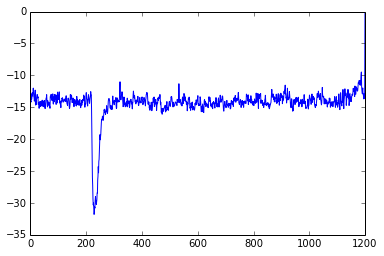

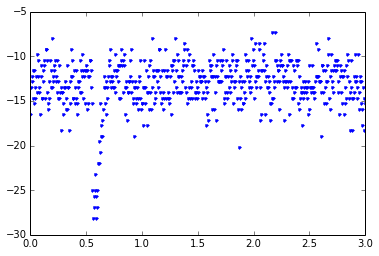

In [5]:

filename = '../experimental/abf_test/20160127_0016.abf'


f = mt.ABFExperimentFile(filename)
xdata, ydata = f.import_data(block=0, segment=0, signal=0)
e = mt.OpsinExperiment(ydata)


e.set_data_density(50, mean_between_steps=True)

plt.plot(e.y)

plt.legend()
plt.show()

e = mt.OpsinExperiment(analogsignals[0], xdata=time)
e.set_data_density(100)
plt.plot(e.x,e.y,'.')

# Tutorial example

In [ ]:
# -*- coding: utf-8 -*-
"""
This is an example for plotting neo object with maplotlib.
"""

import urllib

import numpy as np
import quantities as pq
from matplotlib import pyplot

import neo

url = 'https://portal.g-node.org/neo/'
distantfile = url + 'neuroexplorer/File_neuroexplorer_2.nex'
localfile = 'File_neuroexplorer_2.nex'
urllib.urlretrieve(distantfile, localfile)


reader = neo.io.NeuroExplorerIO(filename='File_neuroexplorer_2.nex')
bl = reader.read(cascade=True, lazy=False)[0]
for seg in bl.segments:
    fig = pyplot.figure(figsize=(15,10))
    
    ax1 = fig.add_subplot(2, 1, 1)  
    ax1.set_title(seg.file_origin)
    mint = 0 * pq.s
    maxt = np.inf * pq.s
    for i, asig in enumerate(seg.analogsignals):
        times = asig.times.rescale('s').magnitude
        asig = asig.rescale('mV').magnitude
        ax1.plot(times, asig)

    ax1.axes.set_xlim([0,70])
    ax1.axes.set_ylim([-5000,5000])
    

    ax2 = fig.add_subplot(2, 1, 2)
    trains = [st.rescale('s').magnitude for st in seg.spiketrains]
    colors = pyplot.cm.jet(np.linspace(0, 1, len(seg.spiketrains)))
    ax2.eventplot(trains, colors=colors)

